In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.stats
#from sklearn import linear_model as lm
from pandas.plotting import scatter_matrix

import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

#plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [2]:
# import Sleuth3 case1201 from csv generated by write.csv in R
sat = pd.read_csv('sat.csv')
sat.axes

[RangeIndex(start=0, stop=50, step=1),
 Index(['Unnamed: 0', 'State', 'SAT', 'Takers', 'Income', 'Years', 'Public',
        'Expend', 'Rank'],
       dtype='object')]

In [3]:
# drop the column of indexs from the csv, probably a better way to do this
sat = sat[['State', 'SAT', 'Takers', 'Income', 'Years', 'Public', 'Expend', 'Rank']]
sat.axes

[RangeIndex(start=0, stop=50, step=1),
 Index(['State', 'SAT', 'Takers', 'Income', 'Years', 'Public', 'Expend',
        'Rank'],
       dtype='object')]

In [4]:
sat.head(n=5)

,State,SAT,Takers,Income,Years,Public,Expend,Rank
0,Iowa,1088,3,326,16.79,87.8,25.60,89.7
1,SouthDakota,1075,2,264,16.07,86.2,19.95,90.6
2,NorthDakota,1068,3,317,16.57,88.3,20.62,89.8
3,Kansas,1045,5,338,16.30,83.9,27.14,86.3
4,Nebraska,1045,5,293,17.25,83.6,21.05,88.5


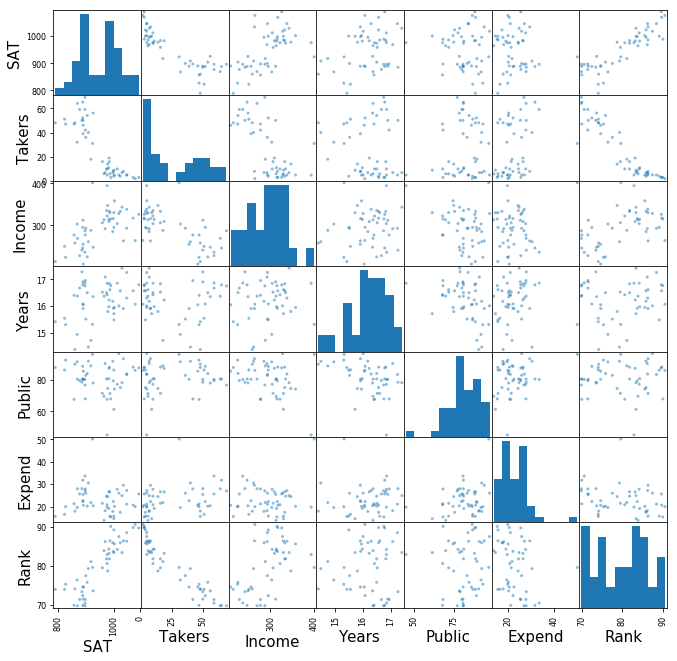

In [5]:
scatter_matrix(sat, figsize=(11,11)); # ';' supresses matplotlib output

In [38]:
# Functions to emulate r plots
# adapted from https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

def residPlot(model, df):
    fitted_y = model.fittedvalues
    resid = model.resid
    abs_resid = np.abs(resid)
    
    resid_plot = plt.figure(1)
    resid_plot.set_figheight(7)
    resid_plot.set_figwidth(11)

    resid_plot.axes[0] = sns.residplot(fitted_y, 'SAT', data=df, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    resid_plot.axes[0].set_title('Residuals vs Fitted')
    resid_plot.axes[0].set_xlabel('Fitted values')
    resid_plot.axes[0].set_ylabel('Residuals')

    # annotations
    abs_resid = abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]

    for i in abs_resid_top_3.index:
        resid_plot.axes[0].annotate(i, xy=(fitted_y[i], resid[i]));
        

def normalQQPlot(model):
    norm_resid = model.get_influence().resid_studentized_internal
    
    QQ = ProbPlot(norm_resid)
    QQplot = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

    QQplot.set_figheight(7)
    QQplot.set_figwidth(11)

    QQplot.axes[0].set_title('Normal Q-Q')
    QQplot.axes[0].set_xlabel('Theoretical Quantiles')
    QQplot.axes[0].set_ylabel('Standardized Residuals');

    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(norm_resid)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]

    for r, i in enumerate(abs_norm_resid_top_3):
        QQplot.axes[0].annotate(i, xy=(np.flip(QQ.theoretical_quantiles, 0)[r], norm_resid[i]));

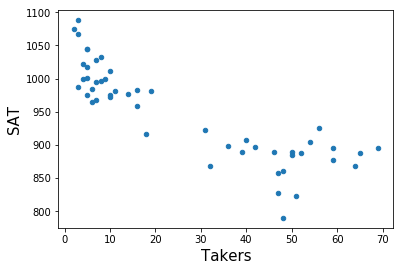

In [103]:
sat.plot.scatter(y='SAT', x='Takers');

In [16]:
lm1 = smf.ols(formula='SAT ~ Takers', data=sat).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAT   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     133.7
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           1.77e-15
Time:                        17:05:01   Log-Likelihood:                -250.19
No. Observations:                  50   AIC:                             504.4
Df Residuals:                      48   BIC:                             508.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1020.3062      8.139    125.359      0.000    1003.941    1036.671
Takers        -2.7600      0.239    -11.563      0.000      -3.240      -2.280
==============================================================================
Omnibus:                        0.370   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.144
Skew:                          -0.131   Prob(JB):                        0.931
Kurtosis:                       3.011   Cond. No.                         53.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

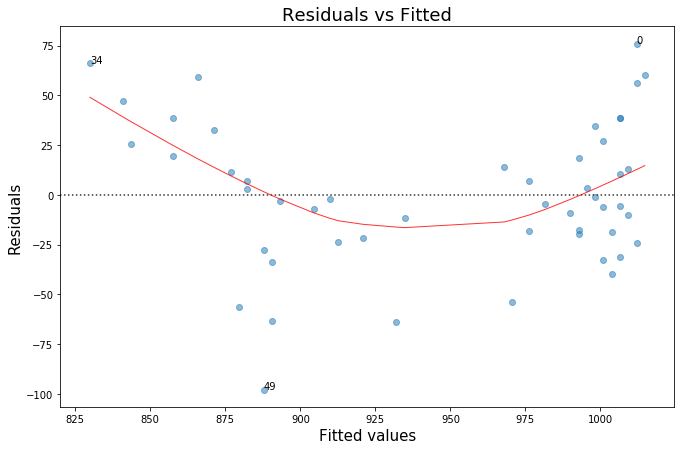

In [25]:
residPlot(lm1, sat)

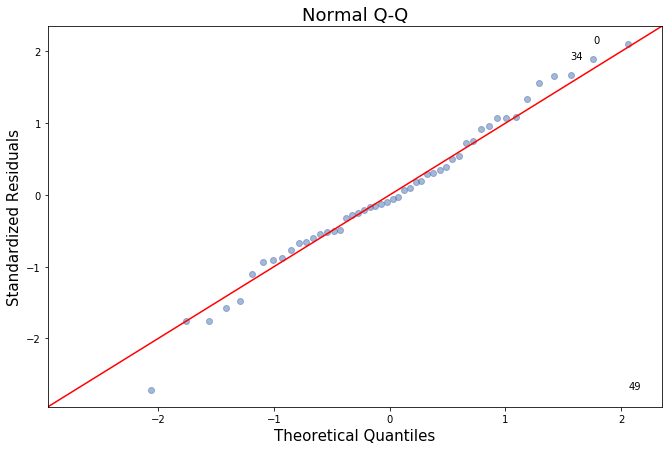

In [26]:
normalQQPlot(lm1)

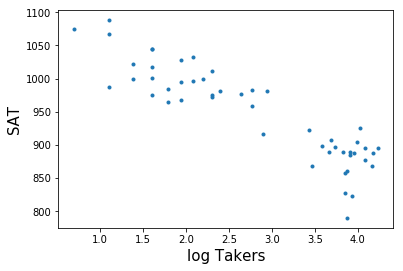

In [36]:
plt.xlabel('log Takers')
plt.ylabel('SAT')
plt.plot(np.log(sat['Takers']), sat['SAT'], '.');

In [12]:
lm2 = smf.ols(formula='SAT ~ np.log(Takers)', data=sat).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAT   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     205.6
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           5.63e-19
Time:                        17:03:40   Log-Likelihood:                -241.86
No. Observations:                  50   AIC:                             487.7
Df Residuals:                      48   BIC:                             491.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1112.2477     12.275     90.611      0.000    1087.567    1136.928
np.log(Takers)   -59.0188      4.116    -14.340      0.000     -67.294     -50.744
==============================================================================
Omnibus:                        6.524   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.611
Skew:                          -0.793   Prob(JB):                       0.0605
Kurtosis:                       3.419   Cond. No.                         9.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

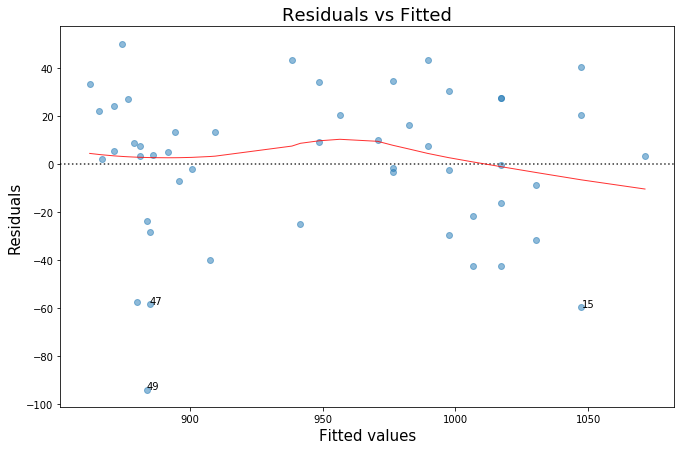

In [27]:
residPlot(lm2, sat)

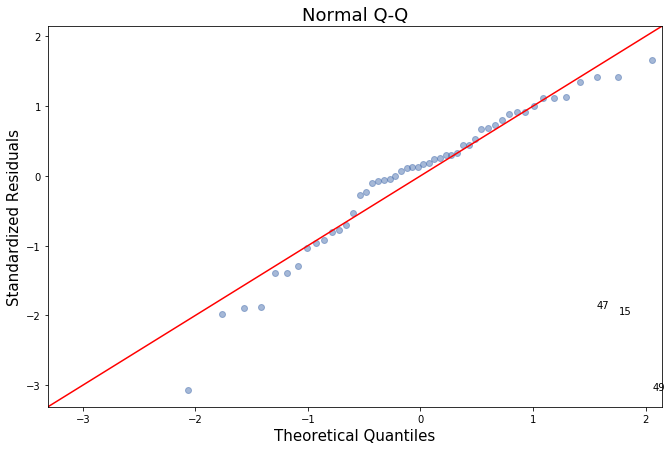

In [28]:
normalQQPlot(lm2)

## Q1  
### Which model does a better job of predicting/explaining SAT?  

Looking at the plot of `Takers` vs `SAT`, the relationship appears more exponential than linear. This is backed up by th Residuals vs Fitted plot, where we see signs of "the dreaded banana". Comparing the natural log of `Takers` with `SAT` shows a solid linear relationsip, with a close-to-constant variance.  
  
This is backed up by the Adjusted $R^2$ of each model, 0.73 for `Takers` and 0.811 for `log Takers`. Both models have close-to-normal residuals, though `Takers` may show slightly better normality than `log Takers`. Still, I think it's safe to conclude that `log Takers` is better at explaining and predicting `SAT`.

In [121]:
lm3 = smf.ols(formula='SAT ~ Income', data=sat).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAT   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     24.90
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           8.33e-06
Time:                        13:10:17   Log-Likelihood:                -273.03
No. Observations:                  50   AIC:                             550.1
Df Residuals:                      48   BIC:                             553.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    669.2994     56.436     11.859      0.000     555.826     782.772
Income         0.9478      0.190      4.990      0.000       0.566       1.330
==============================================================================
Omnibus:                        1.785   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.142
Skew:                           0.358   Prob(JB):                        0.565
Kurtosis:                       3.191   Cond. No.                     2.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

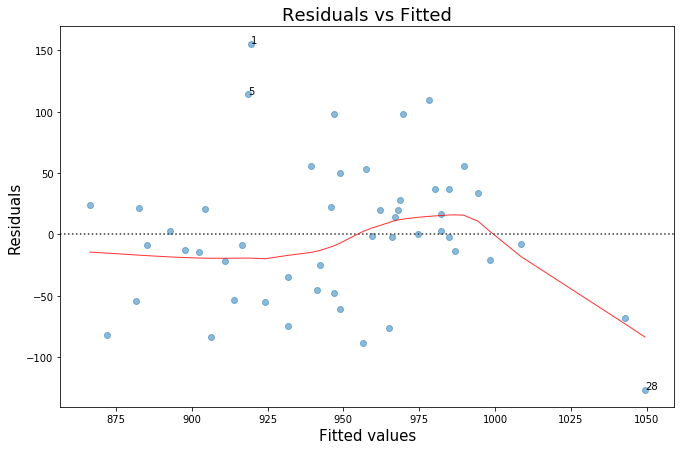

In [41]:
residPlot(lm3, sat)

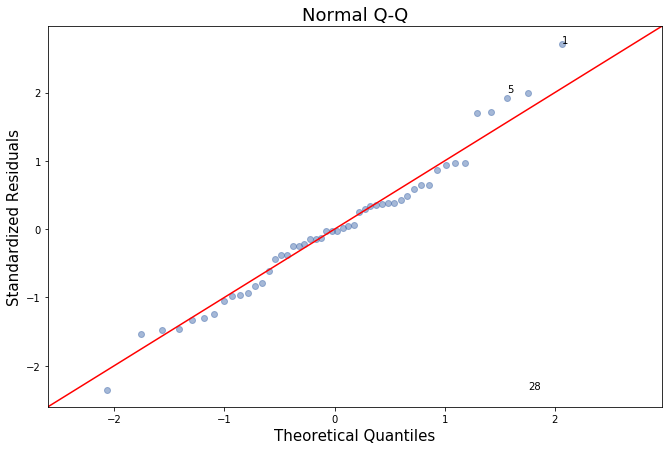

In [42]:
normalQQPlot(lm3)

In [43]:
lm4 = smf.ols(formula='SAT ~ Expend', data=sat).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAT   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.1905
Date:                Fri, 08 Jun 2018   Prob (F-statistic):              0.664
Time:                        11:53:02   Log-Likelihood:                -283.38
No. Observations:                  50   AIC:                             570.8
Df Residuals:                      48   BIC:                             574.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    964.5908     39.462     24.443      0.000     885.246    1043.935
Expend        -0.7250      1.661     -0.436      0.664      -4.065       2.615
==============================================================================
Omnibus:                        1.190   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                0.997
Skew:                          -0.096   Prob(JB):                        0.608
Kurtosis:                       2.336   Cond. No.                         92.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

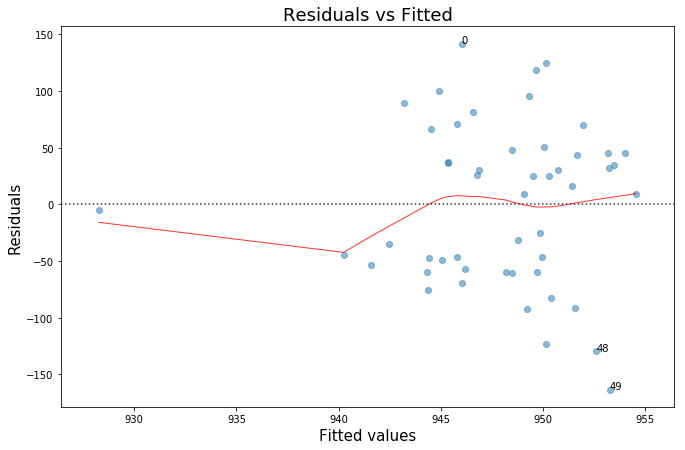

In [44]:
residPlot(lm4, sat)

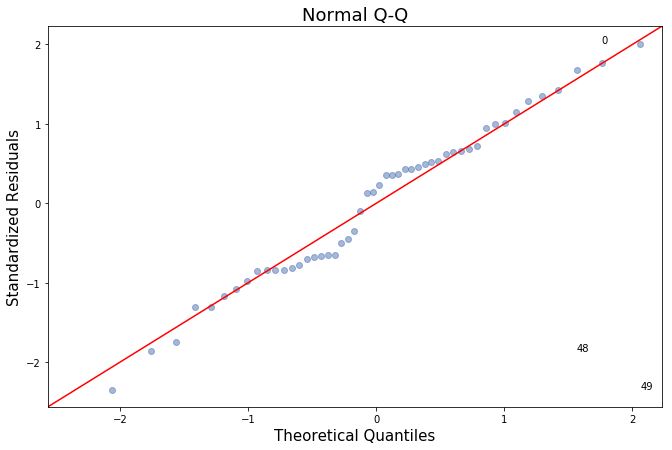

In [45]:
normalQQPlot(lm4)

## Q2  
### Which model does a better job at predicting/explaining sat?  

The slope of the line given to Income vs SAT is .9478, with a very high probability that the true slope is not 0. While adjusted $R^2$ for this model is only 0.379, this turns out to be signifigantly better than that of the model predicting SAT from Expend. Expend predicts less than one percent of variance to SAT, and at a signifigance lever of 0.05 we even reject that the true slope might not be 0.  
While neither residual plot shows constant variance, that of income is better distributed than that of Expend.

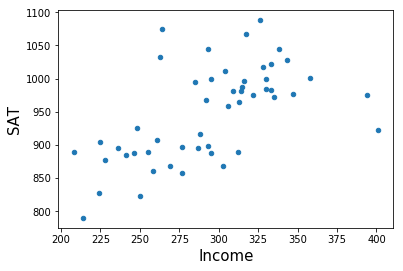

In [46]:
sat.plot.scatter(y='SAT', x='Income');

In [47]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAT   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     24.90
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           8.33e-06
Time:                        11:57:13   Log-Likelihood:                -273.03
No. Observations:                  50   AIC:                             550.1
Df Residuals:                      48   BIC:                             553.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    669.2994     56.436     11.859      0.000     555.826     782.772
Income         0.9478      0.190      4.990      0.000       0.566       1.330
==============================================================================
Omnibus:                        1.785   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.142
Skew:                           0.358   Prob(JB):                        0.565
Kurtosis:                       3.191   Cond. No.                     2.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Q3  
### Explain the relationsip, in terms of linear model slope, between median Income and SAT.  

The graph above shows that while not a perfect fit, there is some linear trend to `Income` vs `SAT`. Looking at the summary of our linear model, we see an expected slope of 0.98 (with high confidence). This is interpreted as an expected increase of .94 units to SAT for each increase of one unit to Income.

In [48]:
lm_inter = smf.ols(formula='SAT ~ Income * Expend', data=sat).fit()
lm_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAT   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     10.76
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           1.78e-05
Time:                        12:00:11   Log-Likelihood:                -270.18
No. Observations:                  50   AIC:                             548.4
Df Residuals:                      46   BIC:                             556.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       370.2728    174.494      2.122      0.039      19.034     721.512
Income            1.9898      0.539      3.689      0.001       0.904       3.075
Expend           11.7006      6.810      1.718      0.092      -2.007      25.408
Income:Expend    -0.0407      0.020     -1.997      0.052      -0.082       0.000
==============================================================================
Omnibus:                        5.353   Durbin-Watson:                   0.595
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                4.316
Skew:                           0.684   Prob(JB):                        0.116
Kurtosis:                       3.445   Cond. No.                     1.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

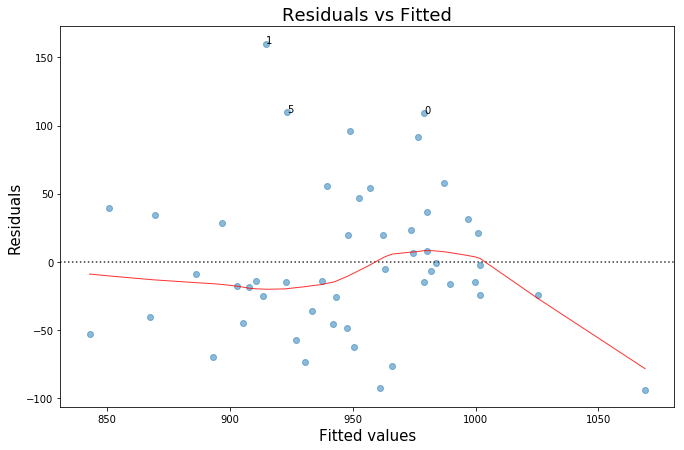

In [50]:
residPlot(lm_inter, sat)

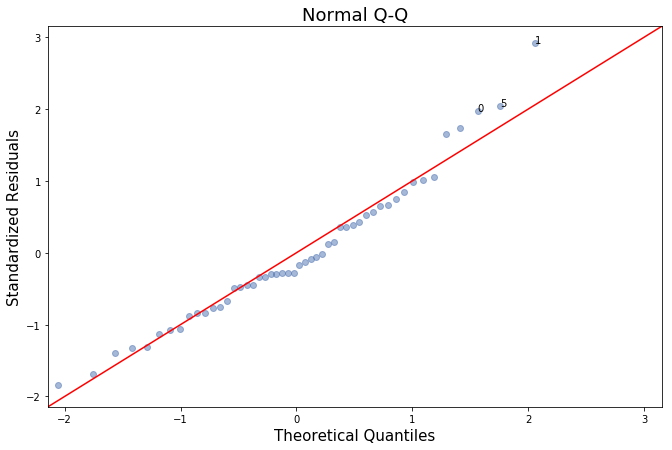

In [58]:
normalQQPlot(lm_inter)

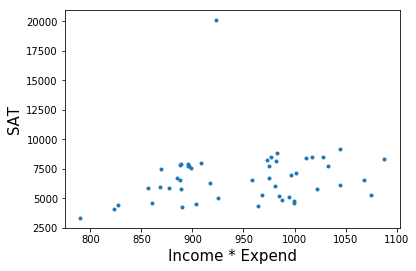

In [57]:
plt.xlabel('Income * Expend')
plt.ylabel('SAT')
plt.plot(sat['SAT'], sat['Income'] * sat['Expend'], '.');

## Q4
### Does there seem to be interaction effect between Income and Expend?  

Looking at the plot of `SAT` vs `Income` * `Expend`, we do see a linear relationship (and a major outlier). Adjusted $R^2$ for the interaction model is 0.374, which is higher than that of either `Income` or `Expend` on their own. Residual variance isn't espicaly constant, but is similar to that of `Income`.  
  
I think we can conclude that there is some interaction effect between the two variables.

In [60]:
lm5 = smf.ols(formula='SAT ~ np.log(Takers) + Income + Years + Public + Expend + Rank', data=sat).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAT   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     59.15
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           3.56e-19
Time:                        12:13:26   Log-Likelihood:                -227.85
No. Observations:                  50   AIC:                             469.7
Df Residuals:                      43   BIC:                             483.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        407.5399    282.763      1.441      0.157    -162.707     977.786
np.log(Takers)   -38.4376     15.952     -2.410      0.020     -70.608      -6.267
Income            -0.0359      0.130     -0.276      0.784      -0.298       0.227
Years             17.2181      6.320      2.724      0.009       4.472      29.964
Public            -0.1130      0.562     -0.201      0.842      -1.247       1.021
Expend             2.5669      0.806      3.183      0.003       0.941       4.193
Rank               4.1143      2.502      1.645      0.107      -0.931       9.159
==============================================================================
Omnibus:                        4.997   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                3.854
Skew:                          -0.602   Prob(JB):                        0.146
Kurtosis:                       3.634   Cond. No.                     2.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Q5
### Do all variables in the full model appear signifigant?  

No. While we see signifigance in `log(Takers)`, `Years`, and `Expend`, there is a decent probibility that other predictor variables have a true coefficent of 0. This is based on the $P>|t|$ values in the model summary.

In [34]:
model1 = smf.ols(formula='SAT ~ np.log(Takers) + Years + Expend', data=sat).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAT   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     115.4
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           2.04e-21
Time:                        14:23:23   Log-Likelihood:                -229.90
No. Observations:                  50   AIC:                             467.8
Df Residuals:                      46   BIC:                             475.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        851.3151     87.022      9.783      0.000     676.149    1026.481
np.log(Takers)   -62.2705      3.593    -17.333      0.000     -69.502     -55.039
Years             12.8334      5.265      2.438      0.019       2.236      23.431
Expend             2.6982      0.620      4.350      0.000       1.450       3.947
==============================================================================
Omnibus:                        1.496   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                0.854
Skew:                          -0.298   Prob(JB):                        0.653
Kurtosis:                       3.231   Cond. No.                         707.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model2 = smf.ols(formula='SAT ~ np.log(Takers) + Income * Expend', data=sat).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAT   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     89.09
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           8.69e-21
Time:                        14:23:35   Log-Likelihood:                -228.77
No. Observations:                  50   AIC:                             467.5
Df Residuals:                      45   BIC:                             477.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        880.1926     85.446     10.301      0.000     708.095    1052.290
np.log(Takers)   -65.3175      4.728    -13.815      0.000     -74.840     -55.795
Income             0.5501      0.260      2.116      0.040       0.026       1.074
Expend            11.1516      3.008      3.708      0.001       5.094      17.209
Income:Expend     -0.0248      0.009     -2.734      0.009      -0.043      -0.007
==============================================================================
Omnibus:                        1.984   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                1.210
Skew:                           0.348   Prob(JB):                        0.546
Kurtosis:                       3.309   Cond. No.                     1.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model3 = smf.ols(formula='SAT ~ np.log(Takers) + Years + Income * Expend', data=sat).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAT   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     74.00
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           2.74e-20
Time:                        14:23:37   Log-Likelihood:                -227.43
No. Observations:                  50   AIC:                             466.9
Df Residuals:                      44   BIC:                             478.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        784.8193    104.113      7.538      0.000     574.993     994.645
np.log(Takers)   -64.1146      4.719    -13.586      0.000     -73.625     -54.604
Years              8.5843      5.520      1.555      0.127      -2.541      19.710
Income             0.4139      0.271      1.530      0.133      -0.131       0.959
Expend             9.2078      3.214      2.865      0.006       2.730      15.686
Income:Expend     -0.0193      0.010     -2.003      0.051      -0.039       0.000
==============================================================================
Omnibus:                        0.996   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.383
Skew:                           0.153   Prob(JB):                        0.826
Kurtosis:                       3.300   Cond. No.                     2.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

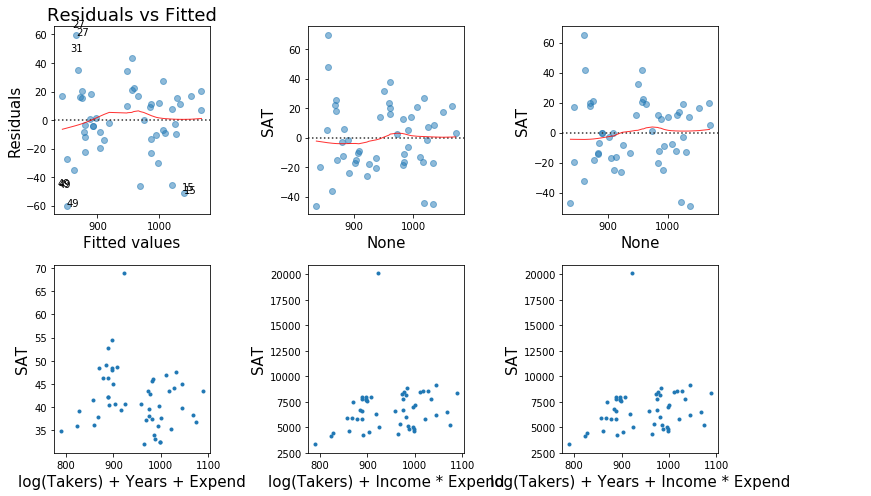

In [40]:
plt.subplot(2,3,1)
residPlot(model1, sat)
plt.subplot(2,3,2)
residPlot(model2, sat)
plt.subplot(2,3,3)
residPlot(model3, sat)
plt.subplot(2,3,4)
plt.xlabel('log(Takers) + Years + Expend')
plt.ylabel('SAT')
plt.plot(sat['SAT'], np.log(sat['Takers']) + sat['Years'] + sat['Expend'], '.');
plt.subplot(2,3,5)
plt.xlabel('log(Takers) + Income * Expend')
plt.ylabel('SAT')
plt.plot(sat['SAT'], np.log(sat['Takers']) + sat['Income'] * sat['Expend'], '.');
plt.subplot(2,3,6)
plt.xlabel('log(Takers) + Years + Income * Expend')
plt.ylabel('SAT')
plt.plot(sat['SAT'], np.log(sat['Takers']) + sat['Years'] + sat['Expend'] * sat['Income'], '.');
plt.tight_layout()

## Q6
### Write out your final model.  

I created 3 models that perdicted/explained SAT well, and ended up chosing the one that compromised between highest $R^2$ and signifigance of all variables.

$$\mathbf{\hat{Y}} = 880.1926 - 65.3175\mathbf{X_1} + 0.5501\mathbf{X_2} + 11.1516\mathbf{X_3} - 0.0248\mathbf{X_2X_3}$$

With $$\mathbf{X_1} = log(Takers)$$
$$\mathbf{X_2} = Income$$
$$\mathbf{X_3} = Expend$$


## Q7
### Are all variables in the model signifigant at the 0.05 level?  

All variables in this model are signifigant at $\alpha = 0.05$. While the model inculding `log(Takers)`, `Years`, `Income`, `Expend`, and `Income * Expend` had a _slightly_ higher adjusted $R^2$, `Years`, `Income`, and `Expend` lost signifigance and fell below (above) the cutoff of 0.05.  
For this reason I chose the model that left out `Years`.

## Q8
### What percentage of variation of SAT is explained by the model?  

Adjusted $R^2$ of the `log(Takers)`, `Income`, `Expend`, and `Income * Expend` model was 0.878, acounting for 87.8% of the variance in `SAT`.  
  
Again, The `log(Takers)`, `Years`, `Income`, `Expend`, and `Income * Expend` model accounted for more variance (Adj. $R^2$ = 0.882), but as the difference was so slight I chose the model with higher ceirtanty in signifigance of predictors.

## Can we do better with deep-learning voodoo magic?
### Code adapted from my 3rd assignment for CS445

In [4]:
def partition(Xs, Ts, porp, shuffle=False):
    if shuffle:
        comb = np.hstack((Xs, Ts))
        np.random.shuffle(comb)
        x_cols = range(Xs.shape[1])
        t_cols = [t + Xs.shape[1] for t in range(Ts.shape[1])]
        Xs = comb[:, x_cols].reshape(-1, Xs.shape[1])
        Ts = comb[:, t_cols].reshape(-1, Ts.shape[1])
    cut = int(Xs.shape[0] * porp)
    return Xs[:cut], Ts[:cut], Xs[cut:], Ts[cut:]

def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

In [5]:
# get numarical data from pandas dataframe
satvals = sat.values
# transpose so dimensions are by column
satvals = satvals.T
satvals;

In [7]:
# Ys holds target variables, Xs holds predictors
Ys = satvals[1]
Xs = satvals[2:]
Ys.shape, Xs.shape

((50,), (6, 50))

In [8]:
Ys = Ys.reshape(1, -1)
Ys.shape

(1, 50)

In [9]:
Ys = Ys.T
Xs = Xs.T
Xs.shape, Ys.shape

((50, 6), (50, 1))

In [10]:
import neuralnetworksA2 as nn

In [11]:
# partition data into training and testing sets
Xtrain, Ytrain, Xtest, Ytest = partition(Xs, Ys, 0.8, shuffle=True)
Xtrain.dtype, Ytrain.dtype, Xtest.dtype, Ytest.dtype

(dtype('O'), dtype('O'), dtype('O'), dtype('O'))

In [12]:
# pandas messed up datatypes, cast back to float
Xtrain = Xtrain.astype('float32')
Ytrain = Ytrain.astype('float32')
Xtest = Xtest.astype('float32')
Ytest = Ytest.astype('float32')

In [20]:
# using five layers of 5 neurons for extra deepness
nnet = nn.NeuralNetwork(Xtrain.shape[1], [5,5,5,5,5], Ytrain.shape[1])
nnet.train(Xtrain, Ytrain, 100)
print(f'Train error: {rmse(Ytrain, nnet.use(Xtrain))}')
print(f'Test error: {rmse(Ytest, nnet.use(Xtest))}')

Train error: 6.630969815326954
Test error: 36.491551854805365


In [21]:
Ys.mean()

947.94

In [22]:
Ys.mean()/rmse(Ytest, nnet.use(Xtest))

25.97697143085931

In [48]:
np.sqrt(model2.mse_resid)

24.757230564525177

Looks like this network can predict SAT about as well as the linear regression model, assuming I'm getting the right error value from the linear model object.

Lets see what it 'looks like'

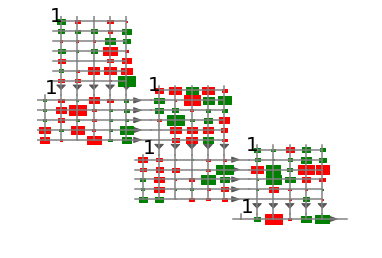

In [23]:
nnet.draw()

In [27]:
nnet.Vs

[array([[ 0.47591318, -0.31303971, -0.03086831, -0.31445385, -0.09722798],
        [ 0.34281805,  0.30889954,  0.36846988, -0.28246516,  0.52008332],
        [-0.12112864, -0.13042399, -0.12776631,  0.60722203,  0.41360679],
        [ 0.42469539,  0.13031498,  0.38033988, -0.78718269, -0.15896502],
        [-0.41372116,  0.02783545, -0.07868117, -0.32659875, -0.50706173],
        [ 0.28151808, -0.20502457, -0.66240475, -0.67297027, -0.63043681],
        [-0.33985539, -0.26793771, -0.07863597, -0.16740855,  0.97419242]]),
 array([[ 0.14139118, -0.2477578 ,  0.09090579, -0.41772962, -0.24913268],
        [ 0.17445066,  0.12991444, -0.42217863, -0.71450767, -0.17956356],
        [ 0.13121162,  0.21436486,  0.11264506, -0.24039303,  0.12198933],
        [-0.17630252,  0.12568719,  0.15609864, -0.47993522,  0.15194877],
        [-0.59609122, -0.12098309,  0.13605907,  0.60238873, -0.39704164],
        [-0.10388093,  0.03240387, -0.61768008,  0.14478882,  0.42081084]]),
 array([[-0.28671439,

Interesting, good luck interpreting those coefficents!